In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from utils import calc_performance, plot_confusion_matrix, calc_test_train_performance

## Note: make sure you have sklearn version >= 0.20.0

In [2]:
raw_df = pd.read_csv('../data/processed/completeddata.csv')

In [3]:
train = raw_df[raw_df.Year <= 2016]
test = raw_df[raw_df.Year > 2016]

In [4]:
FEAT_SET_1 = ['ValueOfProduction', 'MaximumColonies', 'LostColonies', 'AddedColonies', 'Pesticides', 'OtherDiseases', 'UnknownDiseases', 'Tavg', 'Prcp', 'Awnd']
FEAT_SET_2 = ['ValueOfProduction', 'OtherDiseases', 'Awnd', 'AveragePricePerPound', 'LostColonies', 'Prcp']
TARGET = 'YieldClass'

In [5]:
train_mi_corr = train[FEAT_SET_1]
test_mi_corr = test[FEAT_SET_1]
train_lasso = train[FEAT_SET_2]
test_lasso = test[FEAT_SET_2]
y_train = train[TARGET]
y_test = test[TARGET]

In [6]:
param_grid = {'var_smoothing': [1e-15, 1e-12, 1e-9, 1e-6, 1e-3, 1, 10, 20]}

In [7]:
estimator = GaussianNB()

In [8]:
gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, refit=True)
# Scoring is set to accuracy. Tried using log-loss but got really bad results. Models basically predicted 2 for everything...

# Train on features from mutual information analysis and correlation analysis

In [9]:
gs.fit(train_mi_corr, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
/home/cfizette/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'var_smoothing': [1e-15, 1e-12, 1e-09, 1e-06, 0.001, 1, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [10]:
model_mi_corr = gs.best_estimator_

### Best params

In [11]:
gs.best_params_

{'var_smoothing': 1e-15}

### Best score

In [12]:
gs.best_score_

0.36585365853658536

# Train on features from lasso analysis

In [13]:
gs.fit(train_lasso, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
/home/cfizette/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'var_smoothing': [1e-15, 1e-12, 1e-09, 1e-06, 0.001, 1, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [14]:
model_lasso = gs.best_estimator_

### Best params

In [15]:
gs.best_params_

{'var_smoothing': 1e-15}

### Best score

In [16]:
gs.best_score_

0.3902439024390244

# Compare test set performance

In [17]:
y_pred_mi_corr = model_mi_corr.predict(test_mi_corr)
y_proba_mi_corr = model_mi_corr.predict_proba(test_mi_corr)
y_pred_lasso = model_lasso.predict(test_lasso)
y_proba_lasso = model_lasso.predict_proba(test_lasso)

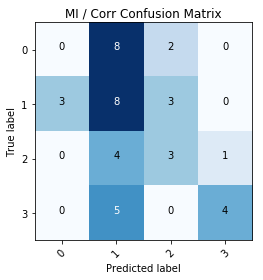

In [18]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_mi_corr), classes=[0,1,2,3], title='MI / Corr Confusion Matrix')

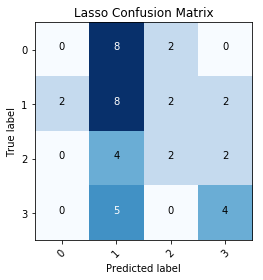

In [19]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lasso), classes=[0,1,2,3], title='Lasso Confusion Matrix')

### Lasso Feature Performance

In [21]:
calc_test_train_performance(model_lasso, train_lasso, test_lasso, y_train, y_test)

,Train_Score,Test_Score
cross_entropy,1.587257,4.155560
accuracy,0.426829,0.341463


### MI / Corr Feature Performance

In [22]:
calc_test_train_performance(model_mi_corr, train_mi_corr, test_mi_corr, y_train, y_test)

,Train_Score,Test_Score
cross_entropy,2.972633,5.836263
accuracy,0.414634,0.365854
